In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
path = '/content/drive/MyDrive/Data Science/Project-48 Pizza Price Prediction Using ML And EVALML(Auto ML)/pizza_v2.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [5]:
df.shape

(129, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [7]:
# checking null values
df.isna().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [8]:
# Nr of Unique values
df.nunique()

company             5
price_rupiah       43
diameter           12
topping            12
variant            20
size                6
extra_sauce         2
extra_cheese        2
extra_mushrooms     2
dtype: int64

In [9]:
# process price columns

df['price'] = df['price_rupiah'].apply(lambda x: np.int64(x.replace('Rp', '').split(',')[0]))
df.drop('price_rupiah', axis=1, inplace=True)

In [10]:
# process diameter columns

df['diameter'] = df['diameter'].apply(lambda x: np.float64(x.split(' ')[0]))

In [11]:
df.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,22.0,chicken,double_signature,jumbo,yes,yes,no,235
1,A,20.0,papperoni,double_signature,jumbo,yes,yes,no,198
2,A,16.0,mushrooms,double_signature,reguler,yes,yes,yes,120
3,A,14.0,smoked_beef,double_signature,reguler,yes,no,yes,155
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,yes,248


In [12]:
sns.set_style('whitegrid')

 --------------------------  company  -----------------------------


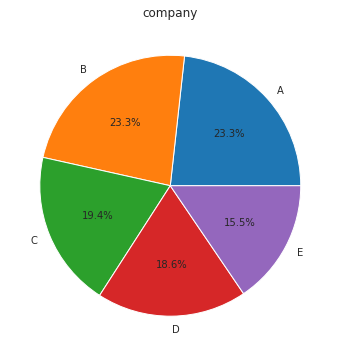


 --------------------------  topping  -----------------------------


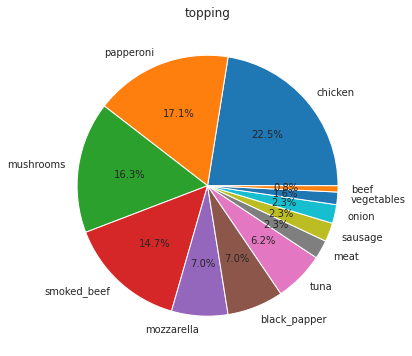


 --------------------------  variant  -----------------------------


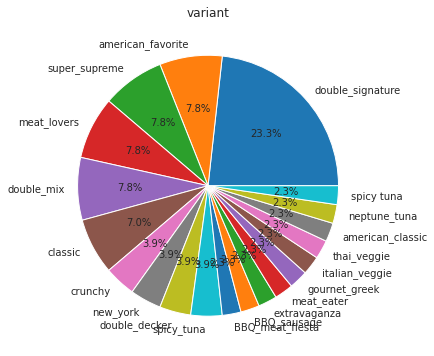


 --------------------------  size  -----------------------------


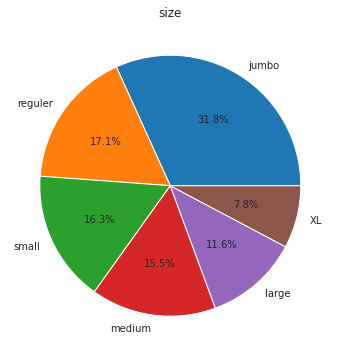


 --------------------------  extra_sauce  -----------------------------


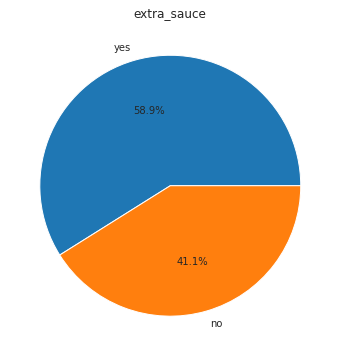


 --------------------------  extra_cheese  -----------------------------


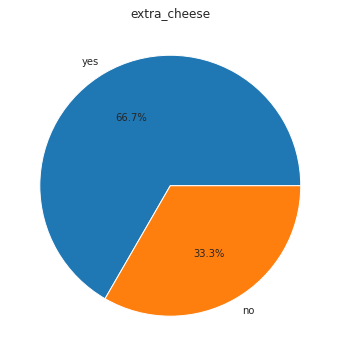


 --------------------------  extra_mushrooms  -----------------------------


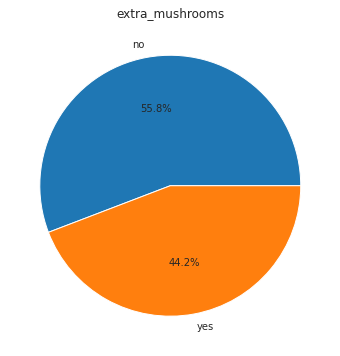

In [13]:
for i in df.select_dtypes('object').columns:
    print(" -------------------------- ",i," -----------------------------")
    plt.figure(figsize=(6, 6))
    plt.title(i)
    plt.pie(x=df[i].value_counts(), labels=df[i].unique(), autopct='%.1f%%')
    plt.show()

#     encoder = LabelEncoder().fit(df[i])
#     df[i] = encoder.transform(df[i])
#     print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

    print()

<AxesSubplot:xlabel='company', ylabel='Count'>

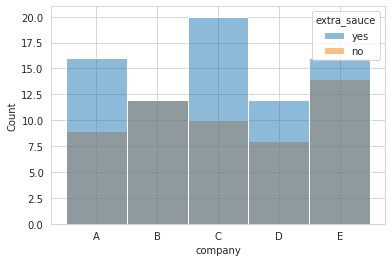

In [14]:
sns.histplot(x=df['company'], hue=df['extra_sauce'] )

In [15]:
df.groupby(['company']).agg({'company':['count']})

,company
,count
company,
A,25
B,24
C,30
D,20
E,30


In [16]:
df.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,A,22.0,chicken,double_signature,jumbo,yes,yes,no,235
1,A,20.0,papperoni,double_signature,jumbo,yes,yes,no,198
2,A,16.0,mushrooms,double_signature,reguler,yes,yes,yes,120
3,A,14.0,smoked_beef,double_signature,reguler,yes,no,yes,155
4,A,18.0,mozzarella,double_signature,jumbo,yes,no,yes,248


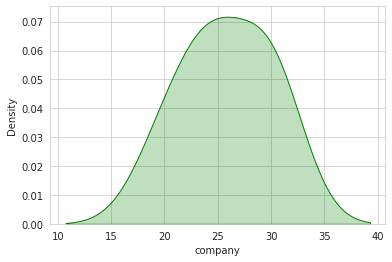

In [17]:
sns.kdeplot(x=df['company'].value_counts(), color='g', fill=True)
plt.show()

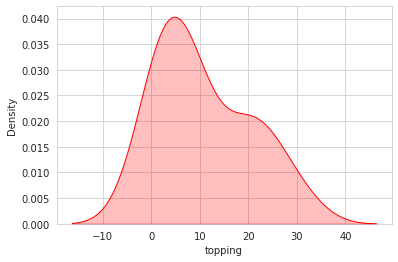

In [18]:
sns.kdeplot(x=df['topping'].value_counts(), color='r', fill=True)
plt.show()

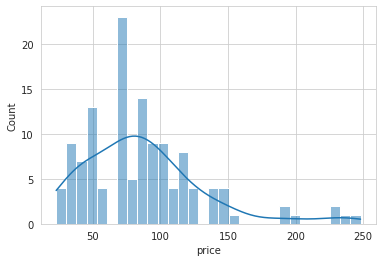

In [19]:
sns.histplot(x=df['price'], bins=30, kde=True)
plt.show()

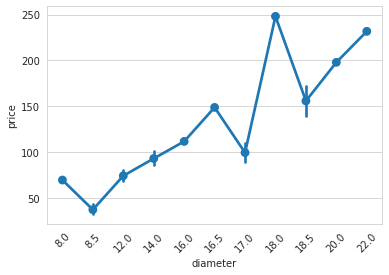

In [20]:
sns.pointplot(data=df, x='diameter', y='price')
plt.xticks(rotation=45)
plt.show()

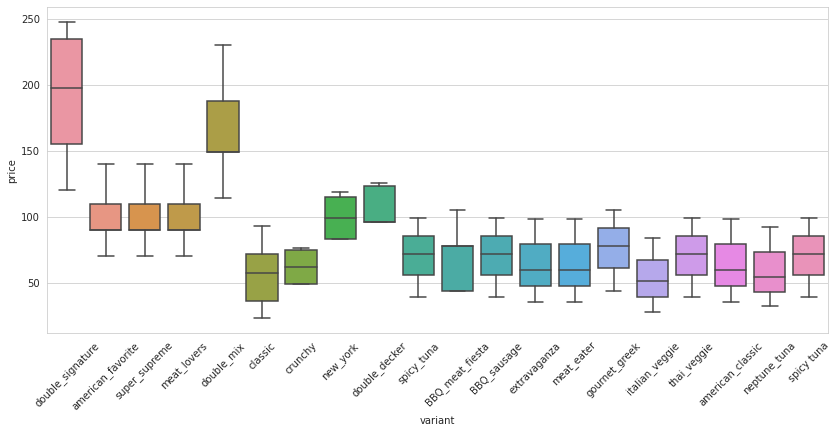

In [21]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='variant', y='price')
plt.xticks(rotation=45)
plt.show()

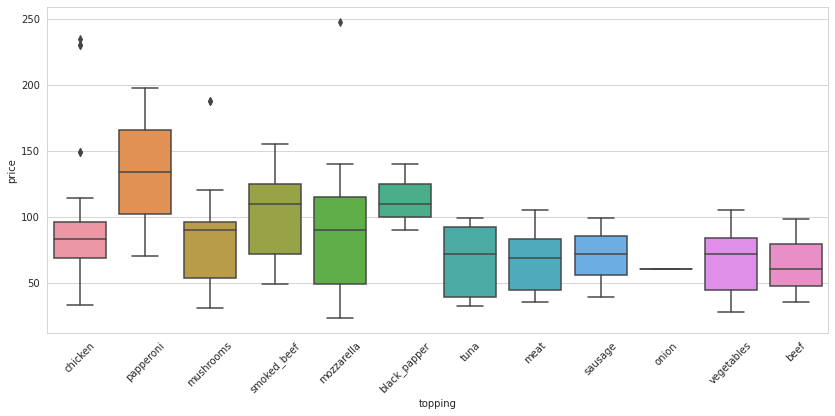

In [22]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='topping', y='price')
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

In [23]:
# label encoding

for i in df.select_dtypes('object').columns:
    print(" -------------------------- ",i," -----------------------------")

    encoder = LabelEncoder().fit(df[i])
    df[i] = encoder.transform(df[i])
    print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

    print()

 --------------------------  company  -----------------------------
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

 --------------------------  topping  -----------------------------
{'beef': 0, 'black_papper': 1, 'chicken': 2, 'meat': 3, 'mozzarella': 4, 'mushrooms': 5, 'onion': 6, 'papperoni': 7, 'sausage': 8, 'smoked_beef': 9, 'tuna': 10, 'vegetables': 11}

 --------------------------  variant  -----------------------------
{'BBQ_meat_fiesta': 0, 'BBQ_sausage': 1, 'american_classic': 2, 'american_favorite': 3, 'classic': 4, 'crunchy': 5, 'double_decker': 6, 'double_mix': 7, 'double_signature': 8, 'extravaganza': 9, 'gournet_greek': 10, 'italian_veggie': 11, 'meat_eater': 12, 'meat_lovers': 13, 'neptune_tuna': 14, 'new_york': 15, 'spicy tuna': 16, 'spicy_tuna': 17, 'super_supreme': 18, 'thai_veggie': 19}

 --------------------------  size  -----------------------------
{'XL': 0, 'jumbo': 1, 'large': 2, 'medium': 3, 'reguler': 4, 'small': 5}

 --------------------------  extra_sauce  -----

In [24]:
df.head()

,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms,price
0,0,22.0,2,8,1,1,1,0,235
1,0,20.0,7,8,1,1,1,0,198
2,0,16.0,5,8,4,1,1,1,120
3,0,14.0,9,8,4,1,0,1,155
4,0,18.0,4,8,1,1,0,1,248


In [25]:
# df = pd.get_dummies(data=df, columns=df.select_dtypes('object').columns, drop_first=True)

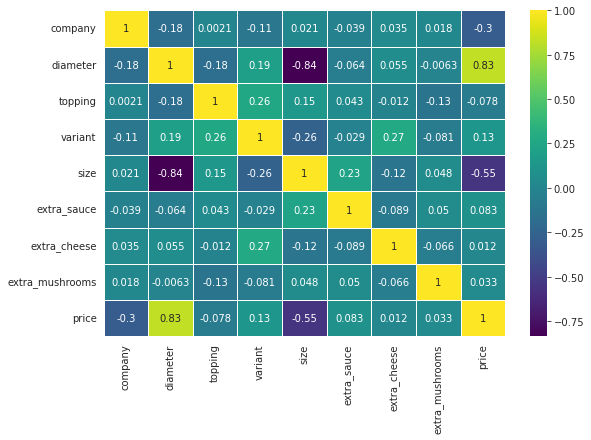

In [26]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.show()

In [27]:
df.shape

(129, 9)

## splitting data

In [28]:
x = df.drop('price', axis=1)
y = df['price'].values

In [29]:
# from sklearn.decomposition import PCA

In [30]:
# pca  = PCA(n_components=10).fit(x)
# x = pca.transform(x)

In [31]:
x.shape

(129, 8)

In [32]:
# splittng data into training and testing
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=44)

## Buidling the model

In [34]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Feature Selection

In [35]:
er = ExtraTreesRegressor(n_estimators=200).fit(x, y)

In [36]:
np.round(er.feature_importances_, 2)

array([0.02, 0.59, 0.04, 0.08, 0.16, 0.08, 0.02, 0.01])

### model

In [37]:
all_models = [LinearRegression, Lasso, RandomForestRegressor, DecisionTreeRegressor, SVR, XGBRegressor]

In [38]:
def get_model_score(model):
    model = model()
    model.fit(X_train, y_train)
    
    print(type(model).__name__)
    print("Training Score", model.score(X_train, y_train))
    print("Testing SCore", model.score(X_test, y_test))
    return model

In [39]:
models = {}
for i in all_models:
    model = get_model_score(i)
    models[type(model).__name__] = model
    print('---'*20)
    

LinearRegression
Training Score 0.7909602995887469
Testing SCore 0.4566661838148839
------------------------------------------------------------
Lasso
Training Score 0.7871709727733871
Testing SCore 0.47505010647281654
------------------------------------------------------------
RandomForestRegressor
Training Score 0.9881657802925696
Testing SCore 0.8883310181363689
------------------------------------------------------------
DecisionTreeRegressor
Training Score 1.0
Testing SCore 0.8630016275075756
------------------------------------------------------------
SVR
Training Score 0.09644132693270491
Testing SCore 0.16852703356758414
------------------------------------------------------------
XGBRegressor
Training Score 0.9999999978816868
Testing SCore 0.7835826393790414
------------------------------------------------------------


## Hyperparameter Tuning

In [40]:
Params = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ["sqrt", "log2", None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [41]:
modelTune = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions=Params, n_iter=5, n_jobs=-1)

In [42]:
%%time
modelTune.fit(X_train, y_train)

CPU times: user 1.27 s, sys: 87.4 ms, total: 1.35 s
Wall time: 33 s


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [43]:
modelTune.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [44]:
model = RandomForestRegressor(n_estimators= 1400,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 90,
 bootstrap= False)

In [45]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=90, max_features='sqrt',
                      n_estimators=1400)

In [46]:
model.score(X_test, y_test)

0.8934858143928446

In [47]:
pred = model.predict(X_test)

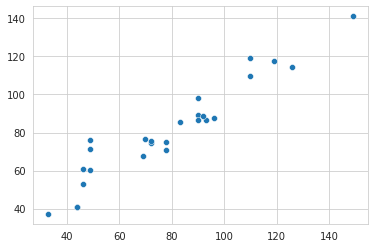

In [48]:
sns.scatterplot(x=y_test, y=pred)
plt.show()

In [49]:
metrics.r2_score(y_test, pred)

0.8934858143928446

## Eval ML

In [50]:
# ! pip install evalml

In [51]:
import evalml

/usr/local/lib/python3.7/dist-packages/woodwork/__init__.py:23: FutureWarning: Woodwork may not support Python 3.7 in next non-bugfix release.
  "Woodwork may not support Python 3.7 in next non-bugfix release.", FutureWarning
Featuretools may not support Python 3.7 in next non-bugfix release.


In [52]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>]

In [53]:
x_train, x_test, y_train, y_test = evalml.preprocessing.split_data(x, y, problem_type='regression')

In [54]:
from evalml.automl import AutoMLSearch

In [55]:
ml = AutoMLSearch(X_train=x_train, y_train=y_train, problem_type='regression')

In [56]:
ml.search()

ERROR:evalml.automl.callbacks:			Fold 0: Exception during automl search: 'TableSchema' object has no attribute '_get_subset_schema'
ERROR:evalml.automl.callbacks:			Fold 0: Parameters:
	{'Imputer': {'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'categorical_fill_value': None, 'numeric_fill_value': None}, 'Elastic Net Regressor': {'alpha': 0.0001, 'l1_ratio': 0.15, 'max_iter': 1000, 'normalize': False}}
ERROR:evalml.automl.callbacks:			Fold 0: Traceback:
  File "/usr/local/lib/python3.7/dist-packages/evalml/automl/engine/engine_base.py", line 224, in train_and_score_pipeline
    pipeline, X_train, y_train, automl_config, schema=False

  File "/usr/local/lib/python3.7/dist-packages/evalml/automl/engine/engine_base.py", line 150, in train_pipeline
    cv_pipeline.fit(X, y)

  File "/usr/local/lib/python3.7/dist-packages/evalml/utils/base_meta.py", line 19, in _set_fit
    return_value = method(self, X, y)

  File "/usr/local/lib/python3.7/dist-packages

AutoMLSearchException: ignored

In [57]:
ml.rankings

,id,pipeline_name,search_order,mean_cv_score,standard_deviation_cv_score,validation_score,percent_better_than_baseline,high_variance_cv,parameters
0,0,Mean Baseline Regression Pipeline,0,-0.003683,0.002665,-0.003683,0.0,False,{'Baseline Regressor': {'strategy': 'mean'}}
1,1,Elastic Net Regressor w/ Imputer + Standard Sc...,1,NaN,NaN,NaN,NaN,False,{'Imputer': {'categorical_impute_strategy': 'm...
2,2,XGBoost Regressor w/ Imputer,2,NaN,NaN,NaN,NaN,False,{'Imputer': {'categorical_impute_strategy': 'm...
3,3,LightGBM Regressor w/ Imputer,3,NaN,NaN,NaN,NaN,False,{'Imputer': {'categorical_impute_strategy': 'm...
4,4,CatBoost Regressor w/ Imputer,4,NaN,NaN,NaN,NaN,False,{'Imputer': {'categorical_impute_strategy': 'm...
5,5,Random Forest Regressor w/ Imputer,5,NaN,NaN,NaN,NaN,False,{'Imputer': {'categorical_impute_strategy': 'm...
6,6,Decision Tree Regressor w/ Imputer,6,NaN,NaN,NaN,NaN,False,{'Imputer': {'categorical_impute_strategy': 'm...
7,7,Extra Trees Regressor w/ Imputer,7,NaN,NaN,NaN,NaN,False,{'Imputer': {'categorical_impute_strategy': 'm...
